In [2]:
#Estas lineas corren solo en google colab:
import os.path 
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False
if IN_COLAB:
  if os.path.exists('/content/ChestXRay2017.zip'):
    print("Datos ya descargados")
  else:
    !wget https://data.mendeley.com/datasets/rscbjbr9sj/2/files/f12eaf6d-6023-432f-acc9-80c9d7393433/ChestXRay2017.zip
    !unzip /content/ChestXRay2017.zip

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: chest_xray/train/PNEUMONIA/person802_bacteria_2708.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person902_bacteria_2827.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person825_bacteria_2736.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1733_bacteria_4566.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person28_bacteria_141.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person494_bacteria_2090.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1088_virus_1800.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person62_bacteria_300.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1328_virus_2295.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1109_bacteria_3050.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person554_bacteria_2320.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person573_bacteria_2369.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1597_bacteria_4192.jpeg  
  inflating: chest_xr

In [20]:
pip install urllib

ERROR: Could not find a version that satisfies the requirement urllib (from versions: none)
ERROR: No matching distribution found for urllib


In [22]:
## importar igamen 
import urllib

url, filename = ("https://github.com/pytorch/hub/raw/master/dog.jpg", "dog.jpg")
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)


SyntaxError: ignored

In [1]:
#1

# librerías usadas
import torch
from torchvision import models
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


# iniciar datos
def load(path):
    image_rgb =Image.open(path).convert("RGB")
    return image_rgb



# transformaciones compose
transformers=transforms.Compose([transforms.Resize([229,229]),
                transforms.CenterCrop(229),
                 transforms.ToTensor(),
                 transforms.Normalize(mean=[0.485,0.456,0.406],std=[0.229,0.224,0.225], inplace = True)
                ])

In [2]:
# 2
from keras.applications.imagenet_utils import decode_predictions
inception_v3_net = models.inception_v3(pretrained=True)

Using TensorFlow backend.
Downloading: "https://download.pytorch.org/models/inception_v3_google-1a9a5a14.pth" to /root/.cache/torch/checkpoints/inception_v3_google-1a9a5a14.pth


In [23]:
inception_v3_net.eval()
filename = '/content/drive/My Drive/dog.jpg'
input_image = Image.open(filename)
input_tensor = transformers(input_image).float()
input_batch = input_tensor.unsqueeze(0)
inception_v3_net(input_batch)

tensor([[-2.3287e-01,  2.2428e-02, -8.5147e-01,  2.5417e-02, -4.4843e-01,
         -3.0125e-01,  1.2461e+00, -3.4536e-01,  2.8840e-01, -3.0703e+00,
         -4.2762e-01, -4.2673e-01, -1.1869e-02,  5.9162e-01,  1.9531e+00,
         -5.9226e-02, -1.1086e+00, -5.3177e-01, -6.5416e-01,  4.4896e-01,
          6.1314e-01, -1.3058e+00, -5.2900e-01, -1.1697e+00,  5.3203e-01,
         -9.7999e-01, -9.8685e-01, -4.7514e-01, -7.9604e-01, -9.0862e-01,
          1.3866e-01,  6.6307e-01,  2.5018e+00, -2.7812e-04,  8.2944e-01,
         -9.1867e-01,  6.7558e-01, -2.8142e-01, -1.2873e-01, -2.6579e-01,
          1.1613e+00,  3.5671e-01, -1.3053e-01,  9.9011e-01,  3.8516e-01,
          4.1506e-02, -1.3192e+00,  1.2974e+00, -7.1345e-01, -2.1509e-01,
         -1.0897e+00,  3.2944e-01,  9.0725e-01, -3.0003e-01,  2.3713e+00,
          1.5371e+00, -2.7418e+00, -1.0461e-04, -6.8316e-01,  4.1690e-01,
          5.3097e-01,  6.2106e-01, -1.3251e+00, -1.1219e+00,  6.4880e-03,
         -4.8380e-01,  5.3717e-01,  2.

In [41]:
# Se mueve la entrada a la gpu 
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    inception_v3_net.to('cuda')

with torch.no_grad():
  output = inception_v3_net(input_batch)

# Tensor se dimesnion 1000
print(output[0])
# se normaliza output anrterior y se aplica softmax para obtner probabilidades
print(torch.nn.functional.softmax(output[0], dim=0))

max=torch.max(torch.nn.functional.softmax(output[0], dim=0)) 
print('maximo es:', max)


tensor([-2.3288e-01,  2.2429e-02, -8.5147e-01,  2.5416e-02, -4.4842e-01,
        -3.0125e-01,  1.2461e+00, -3.4536e-01,  2.8840e-01, -3.0703e+00,
        -4.2762e-01, -4.2673e-01, -1.1869e-02,  5.9162e-01,  1.9531e+00,
        -5.9225e-02, -1.1086e+00, -5.3178e-01, -6.5416e-01,  4.4896e-01,
         6.1314e-01, -1.3058e+00, -5.2900e-01, -1.1697e+00,  5.3203e-01,
        -9.7999e-01, -9.8685e-01, -4.7513e-01, -7.9604e-01, -9.0861e-01,
         1.3866e-01,  6.6307e-01,  2.5018e+00, -2.7227e-04,  8.2945e-01,
        -9.1866e-01,  6.7558e-01, -2.8142e-01, -1.2873e-01, -2.6579e-01,
         1.1613e+00,  3.5671e-01, -1.3053e-01,  9.9012e-01,  3.8516e-01,
         4.1506e-02, -1.3192e+00,  1.2974e+00, -7.1345e-01, -2.1509e-01,
        -1.0897e+00,  3.2944e-01,  9.0725e-01, -3.0003e-01,  2.3713e+00,
         1.5372e+00, -2.7418e+00, -1.0246e-04, -6.8316e-01,  4.1690e-01,
         5.3097e-01,  6.2106e-01, -1.3251e+00, -1.1219e+00,  6.4907e-03,
        -4.8380e-01,  5.3717e-01,  2.4824e+00,  7.1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


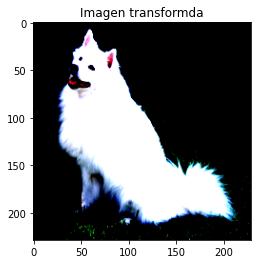

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Numero de segmentos SLIC : 49
(229, 229)


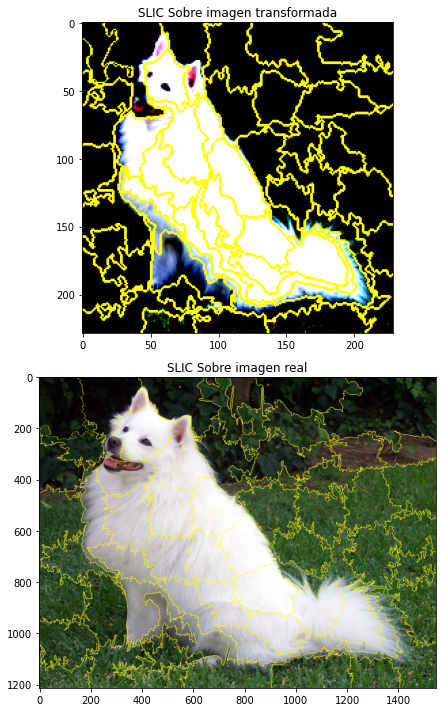

In [86]:

from skimage.color import rgb2gray
from skimage.filters import sobel
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float


### Se conveirte tensor a imangen nuevamente
img = input_batch.cpu().numpy()[0]
#se covneite imangen tomando Height,Width,Channels
img = np.transpose(img, (1,2,0))
###plotear imagen 

plt.imshow(img)
plt.title('Imagen transformda')
plt.show()  

## imagen a float
img=img_as_float(img)


### SE ajustan hiperparametros dados en enunciado
segments_slic = slic(img, n_segments=80, compactness=10, sigma=1)

gradient = sobel(rgb2gray(img))


print(f"Numero de segmentos SLIC : {len(np.unique(segments_slic))}")
print(segments_slic.shape)

fig,(ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

ax1.imshow(mark_boundaries(img, segments_slic))
ax1.set_title('SLIC Sobre imagen transformada')


## se plotea en imagen real
img2=img_as_float(input_image)
segments_slic2 = slic(img2, n_segments=80, compactness=10, sigma=1)

ax2.imshow(mark_boundaries(img2, segments_slic2))
ax2.set_title('SLIC Sobre imagen real')
plt.tight_layout()
plt.show()

In [62]:
##### PARTE 4
import numpy as np
import random
import cv2

def sp_noise(image,prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

#image = cv2.imread('image.jpg',0) # Only for grayscale image
image=img
noise_img = sp_noise(image,0.05)
cv2.imwrite('sp_noise.jpg', noise_img)



True